In [6]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

Establishing, the for loop to run through the frames.

In [7]:
# video indices

video_index_corr = [1, 2, 3, 4, 5, 6, 7, 47, 78, 79, 80, 83, 85, 100, 101, 102, 113, 114, 115, 116, 127, 129, 131, 132, 133
                , 134, 135, 136, 137, 138, 140, 141, 142, 144, 146, 147, 148, 162, 163, 164, 165, 173, 174, 175, 177, 178, 186, 187, 188, 197]
# no 176 after all

video_index_incorr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 36, 37, 42, 44,
                46, 55,56,57,58,81,104,105, 107, 108, 110, 149, 150, 151, 152, 153, 155, 156, 166, 167, 168, 171, 198]


In [8]:
# Establishing which frame position we want, manually.
up_down = 'down' # 'up' or 'down'

# Establishing which label we want, manually.
label = 'correct' # 'correct' or 'incorrect'

if label == 'correct':
    image_dir = 'images/correct_seq'
    corr_inc = 'cor'
    video_indices = video_index_corr
elif label == 'incorrect':
    image_dir = 'images/wrong_seq'
    corr_inc = 'inc'
    video_indices = video_index_incorr
else:
    print('Label not found')
    exit()


# Looping over the video indices
for video_index in video_indices:
    # Constructing the file pattern using the video index
    file_pattern = f'{corr_inc}_{up_down}_{video_index}_*.jpg'
    file_pattern_path = os.path.join(image_dir, file_pattern)
    # Finding the file that matches the pattern
    matching_files = glob.glob(file_pattern_path)
    # There should be only one
    file_path = matching_files[0]

    print(file_path)

    # Here we do the image processing
    # Read the image
    #img = cv2.imread(file_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Extracting the landmarks from the image
    #landmarks = extract_landmarks(file_path)

images/correct_seq/cor_down_1_38.jpg
images/correct_seq/cor_down_2_23.jpg
images/correct_seq/cor_down_3_22.jpg
images/correct_seq/cor_down_4_19.jpg
images/correct_seq/cor_down_5_19.jpg
images/correct_seq/cor_down_6_19.jpg
images/correct_seq/cor_down_7_25.jpg
images/correct_seq/cor_down_47_31.jpg
images/correct_seq/cor_down_78_25.jpg
images/correct_seq/cor_down_79_22.jpg
images/correct_seq/cor_down_80_109.jpg
images/correct_seq/cor_down_83_40.jpg
images/correct_seq/cor_down_85_34.jpg
images/correct_seq/cor_down_100_82.jpg
images/correct_seq/cor_down_101_31.jpg
images/correct_seq/cor_down_102_41.jpg
images/correct_seq/cor_down_113_31.jpg
images/correct_seq/cor_down_114_41.jpg
images/correct_seq/cor_down_115_85.jpg
images/correct_seq/cor_down_116_19.jpg
images/correct_seq/cor_down_127_52.jpg
images/correct_seq/cor_down_129_46.jpg
images/correct_seq/cor_down_131_25.jpg
images/correct_seq/cor_down_132_28.jpg
images/correct_seq/cor_down_133_25.jpg
images/correct_seq/cor_down_134_22.jpg
image

In [9]:
'''
images/correct_seq/cor_down_3_22.jpg
images/correct_seq/cor_down_4_19.jpg
images/correct_seq/cor_down_5_19.jpg
images/correct_seq/cor_down_6_19.jpg
images/correct_seq/cor_down_7_25.jpg
images/correct_seq/cor_down_47_31.jpg
images/correct_seq/cor_down_78_25.jpg
images/correct_seq/cor_down_79_22.jpg
'''


'\nimages/correct_seq/cor_down_3_22.jpg\nimages/correct_seq/cor_down_4_19.jpg\nimages/correct_seq/cor_down_5_19.jpg\nimages/correct_seq/cor_down_6_19.jpg\nimages/correct_seq/cor_down_7_25.jpg\nimages/correct_seq/cor_down_47_31.jpg\nimages/correct_seq/cor_down_78_25.jpg\nimages/correct_seq/cor_down_79_22.jpg\n'

In [10]:
def draw_landmarks_on_image(rgb_image, detection_result, exclude_numbers=[]):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())

    # Draw landmark numbers on the image.
    for i, landmark in enumerate(pose_landmarks):
        if i not in exclude_numbers:  # only number the landmark if it's not in the exclusion list
            cv2.putText(annotated_image, str(i), (int(landmark.x * rgb_image.shape[1]), int(landmark.y * rgb_image.shape[0])), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
  return annotated_image


In [31]:
# Function to extract landmarks (i.e. important points) from an image
def draw_landmarks_on_image(rgb_image, detection_result, exclude_numbers=[]):
    pose_landmarks_list = detection_result.pose_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image,
            pose_landmarks_proto,
            mp.solutions.pose.POSE_CONNECTIONS,
            mp.solutions.drawing_utils.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=4),
            mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 255), thickness=2, circle_radius=2)
        )

        # Draw landmark numbers on the image.
        for i, landmark in enumerate(pose_landmarks):
            if i not in exclude_numbers:  # only number the landmark if it's not in the exclusion list
                cv2.putText(annotated_image, str(i), (int(landmark.x * rgb_image.shape[1]), int(landmark.y * rgb_image.shape[0])),
                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    return annotated_image


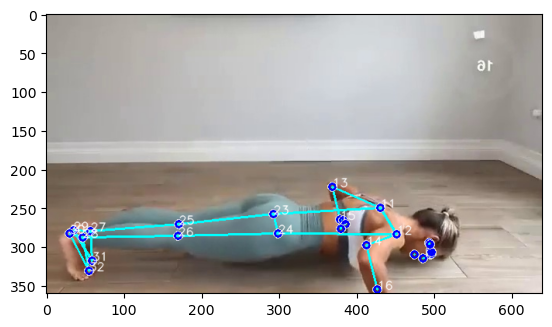

In [32]:
annotated_image = draw_landmarks_on_image(image.numpy_view(), pose_landmarker_result, exclude_numbers=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 22])
plt.imshow(annotated_image)
#plt.axis('off')  # Turn off axis
plt.show()

In [12]:
this_image_path = 'images/correct_seq/cor_down_1_38.jpg'

model_path = 'pose_landmarker_heavy.task'

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

with PoseLandmarker.create_from_options(options) as landmarker:
    # Load the input image from an image file.
    image = mp.Image.create_from_file(this_image_path)

    
    # Perform pose landmarking on the provided single image.
    # The pose landmarker must be created with the image mode.
    pose_landmarker_result = landmarker.detect(image)

    pose_landmarks_list = pose_landmarker_result.pose_landmarks

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [13]:
# this is how we can access the landmarks coordinates
pose_landmarks[0]


NormalizedLandmark(x=0.7596721649169922, y=0.876715362071991, z=0.16197751462459564, visibility=0.9983882904052734, presence=0.9997439980506897)

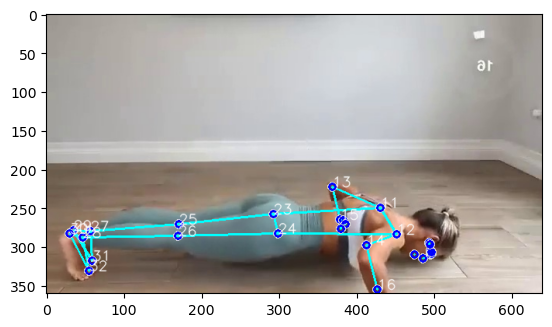

In [14]:
annotated_image = draw_landmarks_on_image(image.numpy_view(), pose_landmarker_result, exclude_numbers=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 22])
plt.imshow(annotated_image)
#plt.axis('off')  # Turn off axis
plt.show()